In [3]:
import  cv2,os
from PIL import Image 
from PIL import Image, ImageOps 
data_path=r'C:\Users\Dell\Desktop\499\dataset bangla\BdSL-D1500\BdSL-D1500'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels))

print(label_dict)
print(categories)
print(labels)

{'0': 0, '00': 1, '000': 2, '1': 3, '2': 4, '3': 5, '4': 6, '5': 7, '6': 8, '7': 9, '8': 10, '9': 11, 'Counting': 12, 'S10_ko_CC': 13, 'S11_Kho_CC': 14, 'S12_go_CC': 15, 'S13_gho_CC': 16, 'S14_Umo_CC': 17, 'S15_co_CC': 18, 'S16_Cho_CC': 19, 'S17_jo_CC': 20, 'S18_jho_CC': 21, 'S19_Io_CC': 22, 'S1_o_CC': 23, 'S20_To_CC': 24, 'S21_THo_CC': 25, 'S22_Do_CC': 26, 'S23_Dho_CC': 27, 'S24_no_CC': 28, 'S25_to_CC': 29, 'S26_tho_CC': 30, 'S27_do_CC': 31, 'S28_dho_CC': 32, 'S29_po_CC': 33, 'S2_a_CC': 34, 'S30_fo_CC': 35, 'S31_bo_CC': 36, 'S32_mo_CC': 37, 'S33_lo_CC': 38, 'S34_so_CC': 39, 'S35_ho_CC': 40, 'S36_onnosar_CC': 41, 'S37_bissorgo_CC': 42, 'S38_Chandrabindu_CC': 43, 'S3_i_CC': 44, 'S4_u_CC': 45, 'S5_ro_CC': 46, 'S6_e_CC': 47, 'S7_Oi_CC': 48, 'S8_O_CC': 49, 'S9_OU_CC': 50, 'Sign 10_ Gho': 51, 'Sign 11_co': 52, 'Sign 12_cho': 53, 'Sign 13_jo': 54, 'Sign 14_Jho': 55, 'Sign 15_To': 56, 'Sign 16_THo': 57, 'Sign 17_DO': 58, 'Sign 18_DHO': 59, 'Sign 19_to': 60, 'Sign 1_o': 61, 'Sign 20_tho': 62, 

In [4]:
import numpy as np
import cv2
import os
from sklearn.cluster import KMeans
from scipy.spatial import distance
from sklearn.cluster import MiniBatchKMeans
from sklearn.svm import SVC
import sklearn.metrics as skmetrics
import random
import pickle
import matplotlib.pyplot as plt
from PIL import Image
import glob
from PIL import ImageTk, Image
from PIL import Image, ImageEnhance
from PIL import Image, ImageFilter 
from PIL import Image, ImageOps



In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
#os.chdir('C:\Users\Dell\Desktop\499\dataset bangla\BdSL-D1500\BdSL-D1500')
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout



# Image Preprocessing

In [6]:
img_size=28
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
            ret,gray=cv2.threshold(gray,120,255,cv2.THRESH_BINARY)
            resized=cv2.resize(gray,(28,28))
            #resizing the gray scale into 100x100, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

KeyboardInterrupt: 

In [ ]:
import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

In [ ]:
np.save('data',data)
np.save('target',new_target)

In [ ]:
print(data.shape, target.shape)

In [7]:


import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')



In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
#os.chdir('C:\Users\Dell\Desktop\499\dataset bangla\BdSL-D1500\BdSL-D1500')
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Convolution2D, MaxPool2D, Dense, Flatten, Dropout



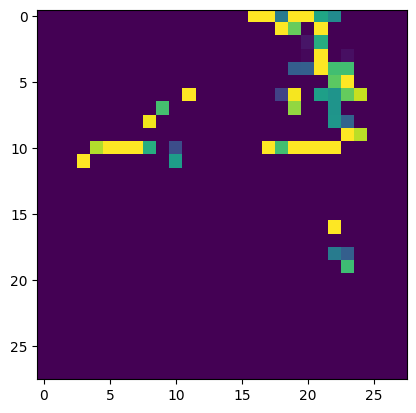

In [10]:
plt.imshow(data[2])

In [11]:
print(target[2])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [9]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=0)



In [10]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(42080, 28, 28, 1) (10520, 28, 28, 1) (42080, 35) (10520, 35)


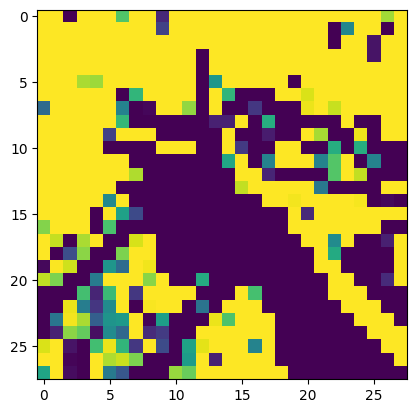

In [14]:


plt.imshow(X_train[0])



In [15]:
print(y_train[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [16]:


print(X_train[0])



[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.1372549 ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

In [11]:
model = Sequential()

model.add(Convolution2D(filters=32,kernel_size=(5,5), activation='relu',input_shape=X_train.shape[1:] ))
model.add(Convolution2D(filters=32,kernel_size=(5,5), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2) ))
model.add(Dropout(rate=0.25))

model.add(Convolution2D(filters=64,kernel_size=(3,3), activation='relu'))
model.add(Convolution2D(filters=64,kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2) ))
model.add(Dropout(rate=0.25))


model.add( tf.keras.layers.Flatten())

model.add(Dense(256, activation='relu' ))
model.add(Dropout(rate=0.25))
model.add(Dense(87, activation='softmax' ))

In [1]:
from tabulate import tabulate

In [12]:
model = Sequential()
layers = [
    ["Layer","Input Shape","Output Shape"],
    ["Conv1","28x28x3","24x24x32"],
    ["Conv2","24x24x32","20x20x32"],
    ["MaxPool","20x20x32","19x19x32"],
    ["Conv3","19x19x32","17x17x64"],
    ["Conv4","17x17x64","15x15x64"],
    ["MaxPool","15x15x64","14x14x64"],
    ["FC1","14x14x64","256"],
    ["FC2","256","87"],
    
]
table = tabulate(layers, headers="firstrow",tablefmt="grid")
print(table)

+---------+---------------+----------------+
| Layer   | Input Shape   | Output Shape   |
+=========+===============+================+
| Conv1   | 28x28x3       | 24x24x32       |
+---------+---------------+----------------+
| Conv2   | 24x24x32      | 20x20x32       |
+---------+---------------+----------------+
| MaxPool | 20x20x32      | 19x19x32       |
+---------+---------------+----------------+
| Conv3   | 19x19x32      | 17x17x64       |
+---------+---------------+----------------+
| Conv4   | 17x17x64      | 15x15x64       |
+---------+---------------+----------------+
| MaxPool | 15x15x64      | 14x14x64       |
+---------+---------------+----------------+
| FC1     | 14x14x64      | 256            |
+---------+---------------+----------------+
| FC2     | 256           | 87             |
+---------+---------------+----------------+


In [ ]:
model.compile(optimizer='adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [46]:
#Train the CNN model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))



Epoch 1/30
3302/3302 [==============================] - 363s 109ms/step - loss: 0.3955 - accuracy: 0.8814 - val_loss: 0.1077 - val_accuracy: 0.9701
Epoch 2/30
3302/3302 [==============================] - 362s 110ms/step - loss: 0.3892 - accuracy: 0.8830 - val_loss: 0.1048 - val_accuracy: 0.9714
Epoch 3/30
3302/3302 [==============================] - 364s 110ms/step - loss: 0.3903 - accuracy: 0.8830 - val_loss: 0.1135 - val_accuracy: 0.9693
Epoch 4/30
3302/3302 [==============================] - 365s 111ms/step - loss: 0.3857 - accuracy: 0.8843 - val_loss: 0.1020 - val_accuracy: 0.9712
Epoch 5/30
3302/3302 [==============================] - 362s 110ms/step - loss: 0.3769 - accuracy: 0.8853 - val_loss: 0.1039 - val_accuracy: 0.9713
Epoch 6/30
3302/3302 [==============================] - 363s 110ms/step - loss: 0.3727 - accuracy: 0.8875 - val_loss: 0.0980 - val_accuracy: 0.9730
Epoch 7/30
3302/3302 [==============================] - 356s 108ms/step - loss: 0.3713 - accuracy: 0.8879 - val_

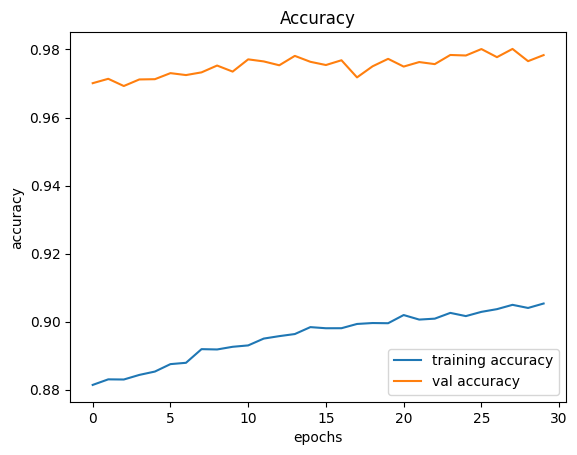

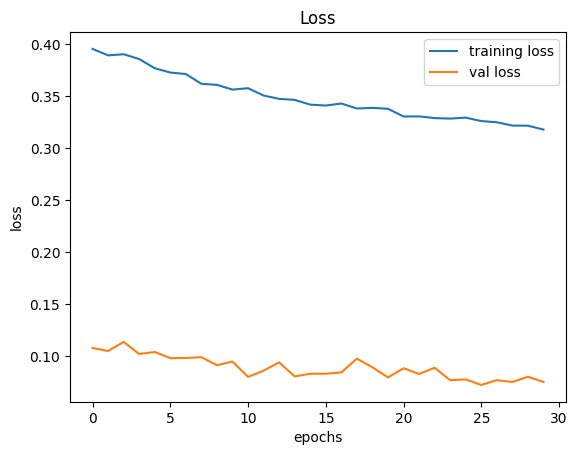

In [47]:


import matplotlib.pyplot as plt

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()



In [48]:
model.save("sign_language_model.h5")



In [ ]:


from keras.models import load_model
model=load_model('sign_language_model.h5')



In [ ]:


score = model.evaluate(X_test, y_test, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])



In [18]:
!pip install torchvision

Defaulting to user installation because normal site-packages is not writeable

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



     ---------------------------------------- 1.2/1.2 MB 75.9 kB/s eta 0:00:00
     ------------------------------------ 172.4/172.4 MB 196.5 kB/s eta 0:00:00
